In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#csv was created with utf-16 encoding for characters in player names.
df = pd.read_csv('world_cup_penalty_data.csv', encoding='utf_8')
df.head()

,game_ID,year,host_country,stage,team,pre_penalties_score,won,winner_took_first_penalty,penalty_round,kick_in_round,penalty_scored,penalty_kicker
0,1,1982,Spain,Semi-finals,West Germany,3,True,False,1,2,True,Manfred Kaltz
1,2,1986,Mexico,Quarter-finals,France,1,True,False,1,2,True,Yannick Stopyra
2,3,1986,Mexico,Quarter-finals,West Germany,0,True,True,1,1,True,Klaus Allofs
3,4,1986,Mexico,Quarter-finals,Belgium,1,True,False,1,2,True,Nico Claesen
4,5,1990,Italy,Second round,Republic of Ireland,0,True,False,1,2,True,Kevin Sheedy


In [3]:
scoringProbByRound = df.pivot_table(index=['penalty_round'], 
                                     values='penalty_scored')
scoringProbByRound.rename(columns={'penalty_scored': 'Overall'}, inplace=True)
scoringProbByRound[['First_Kick_In_Round', 'Second_Kick_In_Round']] = df.pivot_table(index=['penalty_round'], 
                                                                                     columns='kick_in_round', 
                                                                                     values='penalty_scored')

scoringProbByRound['Overall_n'] = df.pivot_table(index=['penalty_round'], 
                                                  values='penalty_scored', 
                                                  aggfunc=lambda x: len(x))
scoringProbByRound[['First_Kick_In_Round_n', 'Second_Kick_In_Round_n']] = df.pivot_table(index=['penalty_round'], 
                                                                                          columns='kick_in_round', 
                                                                                          values='penalty_scored', 
                                                                                          aggfunc=lambda x: len(x))


scoringProbByRound

,Overall,First_Kick_In_Round,Second_Kick_In_Round,Overall_n,First_Kick_In_Round_n,Second_Kick_In_Round_n
penalty_round,,,,,,
1,0.750000,0.733333,0.766667,60,30,30
2,0.733333,0.733333,0.733333,60,30,30
3,0.733333,0.766667,0.700000,60,30,30
4,0.637931,0.666667,0.607143,58,30,28
5,0.648649,0.625000,0.692308,37,24,13
6,0.500000,0.500000,0.500000,4,2,2


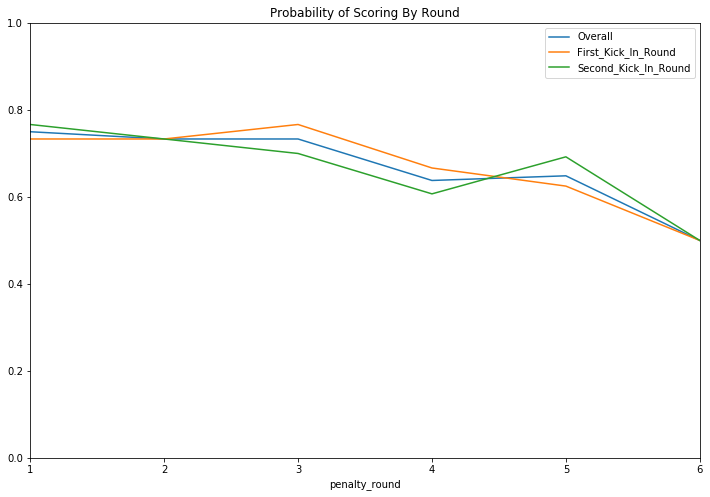

In [58]:
plt.rcParams['figure.figsize'] = (12, 8)
scoringProbByRound[['Overall', 'First_Kick_In_Round', 'Second_Kick_In_Round']].plot()
plt.ylim(0, 1)
plt.title('Probability of Scoring By Round')
plt.show()

In [237]:
#split out only needed columns and get results of first and second kick for each round on same row
kickByRoundDf = df.pivot_table(index=['game_ID', 'penalty_round'], columns='kick_in_round', values='penalty_scored')
kickByRoundDf.head(15)

kick_in_round              1      2
game_ID penalty_round              
1       1               True   True
        2               True   True
        3               True  False
        4              False   True
        5               True   True
        6              False   True
2       1              False   True
        2               True   True
        3               True   True
        4               True  False
        5              False   True
3       1               True   True
        2               True  False
        3               True  False
        4               True   None

In [238]:
#remove multi-indexes so df is easier to iterate through
kickByRoundDf.reset_index(level=kickByRoundDf.index.names, inplace=True)

In [239]:
#get result from preceding 2nd kick on same row as first kicks
prevKickResults = []
for i in range(len(test)):
    if test.iloc[i].penalty_round == 1:
        prevKickResults.append(np.nan)
    else:
        prevKickResults.append(test.iloc[i-1][2])

kickByRoundDf['preceding_2nd_kick_result'] = prevKickResults
kickByRoundDf.head(15)

kick_in_round,game_ID,penalty_round,1,2,preceding_2nd_kick_result
0,1,1,True,True,NaN
1,1,2,True,True,True
2,1,3,True,False,True
3,1,4,False,True,False
4,1,5,True,True,True
5,1,6,False,True,True
6,2,1,False,True,NaN
7,2,2,True,True,True
8,2,3,True,True,True
9,2,4,True,False,True


In [243]:
#going to use df.mean so want to check it doesn't include na values in calculation
#should get same result both ways
print(kickByRoundDf[2].sum() / len(kickByRoundDf.dropna(subset=[2])))
print(kickByRoundDf[2].mean())

#both are the same so it's okay to use.

0.6992481203007519
0.699248120301


In [241]:
print("Probabilities of:")
print("-----------------")

print("1st kick of round scoring: {0:.1f}% (n={1})".format(
    kickByRoundDf[1].mean()*100, len(kickByRoundDf[1].dropna())))
print("2nd kick of round scoring: {0:.1f}% (n={1})".format(
    kickByRoundDf[2].mean()*100, len(kickByRoundDf[2].dropna())))


print("-----------------------------------")
print("-1st kick of round scoring after...")
print("Previous round's second kick scored: {0:.1f}% (n={1})".format(
    kickByRoundDf[kickByRoundDf.preceding_2nd_kick_result==True][1].mean()*100,
    len(kickByRoundDf[kickByRoundDf.preceding_2nd_kick_result==True][1].dropna())))
print("Previous round's second kick missed: {0:.1f}% (n={1})".format(
    kickByRoundDf[kickByRoundDf.preceding_2nd_kick_result==False][1].mean()*100,
    len(kickByRoundDf[kickByRoundDf.preceding_2nd_kick_result==False][1].dropna())))


print("-----------------------------------")
print("-2nd kick of round scoring after...")
print("1st round scored: {0:.1f}% (n={1})".format(
    kickByRoundDf[kickByRoundDf[1]==True][2].mean()*100,
    len(kickByRoundDf[kickByRoundDf[1]==True][2].dropna())))
print("1st round missed: {0:.1f}% (n={1})".format(
    kickByRoundDf[kickByRoundDf[1]==False][2].mean()*100,
    len(kickByRoundDf[kickByRoundDf[1]==False][2].dropna())))

Probabilities of:
-----------------
1st kick of round scoring: 70.5% (n=146)
2nd kick of round scoring: 69.9% (n=133)
-----------------------------------
-1st kick of round scoring after...
Previous round's second kick scored: 69.9% (n=83)
Previous round's second kick missed: 69.7% (n=33)
-----------------------------------
-2nd kick of round scoring after...
1st round scored: 71.6% (n=95)
1st round missed: 65.8% (n=38)
